# Pondering the Dilemma of Bias and Variance

## Understanding bias and variance 

## Defining a strategy for picking the right model

Regression	<BR>
‘mean_absolute_error’	sklearn.metrics.mean_absolute_error<BR>
‘mean_squared_error’	sklearn.metrics.mean_squared_error<BR>
‘r2’	sklearn.metrics.r2_score<BR>
<P>
Classification	 <BR>
‘accuracy’	sklearn.metrics.accuracy_score<BR>
‘average_precision’	sklearn.metrics.average_precision_score<BR>
‘f1’	sklearn.metrics.f1_score<BR>
‘precision’	sklearn.metrics.precision_score<BR>
‘recall’	sklearn.metrics.recall_score<BR>
‘roc_auc’	sklearn.metrics.roc_auc_score<BR>

## Dividing between training, test and validation

In [233]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
print X.shape, y.shape

(506L, 13L) (506L,)


In [242]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regression = LinearRegression()
regression.fit(X,y)
print 'Mean squared error: %.2f' % mean_squared_error(y_true=y, y_pred=regression.predict(X))

Mean squared error: 21.90


In [235]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
print X_train.shape, X_test.shape

(354L, 13L) (152L, 13L)


In [236]:
regression.fit(X_train,y_train)
print 'Train mean squared error: %.2f' % mean_squared_error(y_true=y_train, y_pred=regression.predict(X_train))

Train mean squared error: 19.07


In [237]:
print 'Test mean squared error: %.2f' % mean_squared_error(y_true=y_test, y_pred=regression.predict(X_test))

Test mean squared error: 30.70


In [238]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)
regression.fit(X_train,y_train)
print 'Train mean squared error: %.2f' % mean_squared_error(y_true=y_train, y_pred=regression.predict(X_train))
print 'Test mean squared error: %.2f' % mean_squared_error(y_true=y_test, y_pred=regression.predict(X_test))

Train mean squared error: 19.48
Test mean squared error: 28.33


# Cross-validating, Rather Than Overfitting

In [72]:
from sklearn.cross_validation import cross_val_score

# sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None, cv=None, 
# n_jobs=1, verbose=0, fit_params=None, score_func=None, pre_dispatch='2*n_jobs')

## Using cross-validation on k folds

In [239]:
crossvalidation = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)
scores = cross_val_score(regression, X, y, scoring='mean_squared_error', cv=crossvalidation, n_jobs=1)
print 'Folds: %i, mean squared error: %.2f std: %.2f' % (len(scores),np.mean(np.abs(scores)),np.std(scores))

Folds: 10, mean squared error: 23.76 std: 12.13


In [240]:
def cross_validation_loop(cross_validation_iterator):
    cv_mse = list()
    for nfold, (train_idx, test_idx) in enumerate(cross_validation_iterator):
            regression.fit(X[train_idx,:],y[train_idx])
            cv_mse.append(mean_squared_error(y_true=y[test_idx], y_pred=regression.predict(X[test_idx,:])))
    return nfold+1, np.abs(np.mean(cv_mse)), np.std(cv_mse)

In [241]:
from sklearn.cross_validation import KFold
crossvalidation = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)
print '%i folds cross validation mean squared error: %.2f std: %.2f' % (cross_validation_loop(crossvalidation))

10 folds cross validation mean squared error: 23.76 std: 12.13


## Sampling stratifications for complex data

In [ ]:
# cross_val_score -> automatic startification based on y classes

In [ ]:
# sklearn.cross_validation.StratifiedKFold(y, n_folds=3, indices=None, shuffle=False, random_state=None)

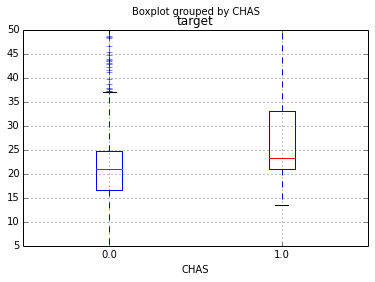

In [181]:
import pandas as pd
df = pd.DataFrame(X, columns=boston.feature_names)
df['target'] = y
boxplot = df.boxplot('target', by='CHAS', return_type='axes')

In [243]:
from sklearn.cross_validation import StratifiedKFold
stratification = StratifiedKFold(y=X[:,3], n_folds=10, shuffle=True, random_state=1)
scores = cross_val_score(regression, X, y, scoring='mean_squared_error', cv=stratification, n_jobs=1)
print 'Stratified %i folds cross validation mean squared error: %.2f std: %.2f' % (len(scores),np.mean(np.abs(scores)),np.std(scores))

Stratified 10 folds cross validation mean squared error: 23.70 std: 6.10


## Performing leave-one-out cross-validation

In [170]:
scores = cross_val_score(regression, X, y, scoring='mean_squared_error', cv=X.shape[0], n_jobs=1)
print 'Folds: %i, mean squared error: %.2f std: %.2f' % (len(scores),np.mean(np.abs(scores)),np.std(scores))

Folds: 506, mean squared error: 23.73 std: 65.25


In [209]:
from sklearn.cross_validation import LeaveOneOut
LOO = LeaveOneOut(n=X.shape[0])
print 'Stratified %i folds cross validation mean squared error: %.2f std: %.2f' % (cross_validation_loop(LOO))        

Stratified 506 folds cross validation mean squared error: 23.73 std: 65.25


# Bootstrapping Statistics

## Using subsampling

In [206]:
from sklearn.cross_validation import ShuffleSplit
subsampling = ShuffleSplit(n=X.shape[0], n_iter=100, test_size=0.3, random_state=0)
print 'Subsampling %i fold cross validation mean squared error: %.2f std: %.2f' % (cross_validation_loop(subsampling))        

Subsampling 100 fold cross validation mean squared error: 23.88 std: 4.06


## Using bootstrapping

In [207]:
from sklearn.cross_validation import Bootstrap
boot = Bootstrap(n=X.shape[0], n_iter=300, test_size=0.2, random_state=0)
print 'Subsampling %i fold cross validation mean squared error: %.2f std: %.2f' % (cross_validation_loop(boot))    

Subsampling 300 fold cross validation mean squared error: 26.72 std: 9.06


C:\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\sklearn\cross_validation.py:684: DeprecationWarning: Bootstrap will no longer be supported as a cross-validation method as of version 0.15 and will be removed in 0.17
  "will be removed in 0.17", DeprecationWarning)


# Selecting Variables Like a Pro

## Selecting on univariate measures

In [140]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression # chi2, f_classif
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)

SelectPercentile(percentile=25,
         score_func=<function f_regression at 0x000000000AFAD588>)

In [223]:
for n,s in zip(boston.feature_names,Selector_f.scores_):
    print 'F-score: %3.2f\t for feature %s ' % (s,n)

F-score: 88.15	 for feature CRIM 
F-score: 75.26	 for feature ZN 
F-score: 153.95	 for feature INDUS 
F-score: 15.97	 for feature CHAS 
F-score: 112.59	 for feature NOX 
F-score: 471.85	 for feature RM 
F-score: 83.48	 for feature AGE 
F-score: 33.58	 for feature DIS 
F-score: 85.91	 for feature RAD 
F-score: 141.76	 for feature TAX 
F-score: 175.11	 for feature PTRATIO 
F-score: 63.05	 for feature B 
F-score: 601.62	 for feature LSTAT 


## Using a greedy search

In [143]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=regression, cv=10, scoring='mean_squared_error')
selector.fit(X, y)
print("Optimal number of features : %d" % selector.n_features_)

Optimal number of features : 6


In [147]:
print boston.feature_names[selector.support_]

['CHAS' 'NOX' 'RM' 'DIS' 'PTRATIO' 'LSTAT']


## Leveraging powerful algorithms

In [150]:
from sklearn.ensemble import RandomForestRegressor
ensemble = RandomForestRegressor(n_estimators=100, oob_score=True)
ensemble.fit(X, y)
print 'Out of the bag score: %.3f' % ensemble.oob_score_
X_s = ensemble.transform(X)

Out of the bag score: 0.880


# Pumping up your hyper-parameters

In [2]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print X.shape, y.shape

(150L, 4L) (150L,)


## Implementing a grid search

In [3]:
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors = 1 to 5
# weights  = uniform / distance
# p = 1 (manhattan distance), 2 (euclidean distance)

In [4]:
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric= 'minkowski', p=2)
grid = {'n_neighbors': range(1,11), 'weights': ['uniform', 'distance'], 'p': [1,2]}
print 'Number of tested models: %i' % np.prod([len(grid[element]) for element in grid])
score_metric = 'accuracy'

Number of tested models: 40


In [5]:
from sklearn.cross_validation import cross_val_score
print 'Baseline with default parameters: %.3f' % np.mean(cross_val_score(classifier, X, y, cv=10, scoring=score_metric, n_jobs=1))

Baseline with default parameters: 0.967


In [6]:
from sklearn.grid_search import GridSearchCV
search = GridSearchCV(estimator=classifier, param_grid=grid, 
                                       scoring=score_metric, n_jobs=1, refit=True, cv=10)
search.fit(X,y)

GridSearchCV(cv=10,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [7]:
print 'Best parameters: %s' % search.best_params_
print 'CV Accuracy of best parameters: %.3f' % search.best_score_

Best parameters: {'n_neighbors': 9, 'weights': 'uniform', 'p': 1}
CV Accuracy of best parameters: 0.973


In [8]:
search.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform', 'p': 1},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance', 'p': 1},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform', 'p': 2},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance', 'p': 2},
 mean: 0.94000, std: 0.06289, params: {'n_neighbors': 2, 'weights': 'uniform', 'p': 1},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance', 'p': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform', 'p': 2},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance', 'p': 2},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 3, 'weights': 'uniform', 'p': 1},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 3, 'weights': 'distance', 'p': 1},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2},
 mean: 0.96667, std: 0.0447

In [18]:
from sklearn.learning_curve import validation_curve
train_scores, test_scores = validation_curve(KNeighborsClassifier(weights='uniform', metric= 'minkowski', p=1), X, y, 
                                             'n_neighbors', param_range=range(1,11), cv=10, scoring='accuracy', n_jobs=1)

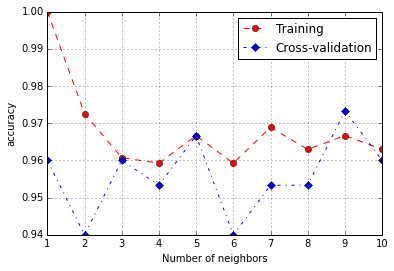

In [19]:
mean_train  = np.mean(train_scores,axis=1)
mean_test   = np.mean(test_scores,axis=1)

import matplotlib.pyplot as plt
plt.plot(range(1,11),mean_train,'ro--', label='Training')
plt.plot(range(1,11),mean_test,'bD-.', label='Cross-validation')
plt.grid()
plt.xlabel('Number of neighbors') # adds label to x axis
plt.ylabel('accuracy') # adds label to y axis
plt.legend(loc='upper right', numpoints= 1)
plt.show()

## Trying a randomized search

In [26]:
from sklearn.grid_search import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=grid, n_iter=10, 
                                   scoring=score_metric, n_jobs=1, refit=True, cv=10, )
random_search.fit(X,y)

RandomizedSearchCV(cv=10,
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
          fit_params={}, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [27]:
print 'Best parameters: %s' % random_search.best_params_
print 'CV Accuracy of best parameters: %.3f' % random_search.best_score_

Best parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2}
CV Accuracy of best parameters: 0.967


### Wrapping up everything

In [226]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

grid = {'vselection__percentile':[25,50,75,100], 
        'model__n_neighbors': range(1,11), 'model__weights': ['uniform', 'distance'], 'model__p': [1,2]}
score_metric = 'mean_squared_error'

selector = SelectPercentile(f_regression)
regression = KNeighborsRegressor()
procedure = Pipeline(steps=[('vselection',selector),('model',regression)])
search = GridSearchCV(estimator=procedure, param_grid=grid, scoring=score_metric, n_jobs=1, refit=True, cv=10)
search.fit(X,y)

GridSearchCV(cv=10,
       estimator=Pipeline(steps=[('vselection', SelectPercentile(percentile=10,
         score_func=<function f_regression at 0x000000000AFAD588>)), ('model', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform'))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'model__weights': ['uniform', 'distance'], 'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'vselection__percentile': [25, 50, 75, 100], 'model__p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)

In [232]:
print 'Best parameters: %s' % search.best_params_
print 'CV Accuracy of best parameters: %.2f' % abs(search.best_score_)

Best parameters: {'model__weights': 'distance', 'model__n_neighbors': 10, 'vselection__percentile': 25, 'model__p': 1}
CV Accuracy of best parameters: 25.053
